In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2022-12-21 15:02:44.894111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

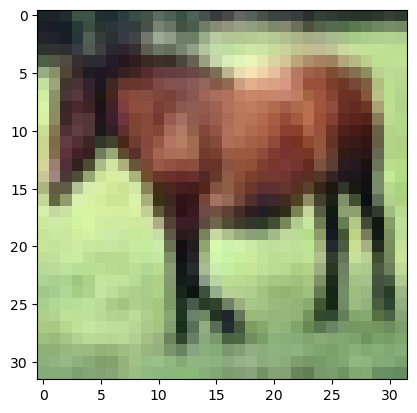

In [4]:
plt.imshow(train_images[7])

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

2022-12-21 15:02:48.939243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 15:02:48.939688: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
history = model.fit(train_images, train_labels,epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.5726 - accuracy: 0.7971 - val_loss: 0.8538 - val_accuracy: 0.7236
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.5410 - accuracy: 0.8087 - val_loss: 0.8754 - val_accuracy: 0.7171
Epoch 3/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.5118 - accuracy: 0.8182 - val_loss: 0.8970 - val_accuracy: 0.7195
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.4876 - accuracy: 0.8277 - val_loss: 0.9111 - val_accuracy: 0.7155
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.4626 - accuracy: 0.8354 - val_loss: 0.9317 - val_accuracy: 0.7183
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.4364 - accuracy: 0.8462 - val_loss: 1.0339 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.4207 - accuracy: 0.8480 - val_loss: 1.0125 

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 1.1206 - accuracy: 0.7098 - 2s/epoch - 7ms/step


In [14]:
print( test_accuracy)

0.7098000049591064
